In [1]:
import librosa
import numpy as np
import os
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt 

def analyze_music_file(audio_file):

    if ".wav" not in audio_file and  ".mp3" not in audio_file: 
        return
    # Load the audio file
    y, sr = librosa.load(audio_file)
    
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr), axis=1)
    tempo, _ = librosa.beat.beat_track(y=y, sr=sr)
    rolloff = np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr))
    chroma = np.mean(librosa.feature.chroma_stft(y=y, sr=sr))
    spectral_centroid = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr))
    spectral_flatness = np.mean(librosa.feature.spectral_flatness(y=y))

    
    print('mfcc: {}'.format(mfcc[0]))
    print('tempo as is: {}'.format(tempo))
    print('tempo: {}'.format(tempo[0]))
    print('rolloff: {}'.format(rolloff))
    print('chroma: {}'.format(chroma))
    print('spectral_centroid: {}'.format(spectral_centroid))
    print('spectral_flatness: {}'.format(spectral_flatness))

    return np.array([mfcc[0], tempo[0], rolloff, chroma, spectral_centroid, spectral_flatness])
  



In [2]:
import pandas as pd
import matplotlib.pyplot as plt

def k_means_cluster(input_song_features, dataset_features, num_clusters=5):
    dataset_features = np.array(dataset_features)  # Convert list of lists to 2D numpy array
    input_song_features = np.array(input_song_features).reshape(1, -1)  # Convert input features to 2D numpy array
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(dataset_features)
    prediction = kmeans.predict(input_song_features)
    print('prediction: {}'.format(prediction))
    return prediction


def plot_histograms(dataset_features):
    mfcc = [x[0] for x in dataset_features]
    tempo = [x[1] for x in dataset_features]
    rolloff = [x[2] for x in dataset_features]
    chroma = [x[3] for x in dataset_features]
    spectral_centroid = [x[4] for x in dataset_features]
    spectral_flatness = [x[5] for x in dataset_features]
        
    df_mfcc = pd.DataFrame(mfcc, columns =['mfcc'])
    df_tempo = pd.DataFrame(tempo, columns =['tempo'])
    df_rolloff = pd.DataFrame(rolloff, columns =['rolloff'])
    df_chroma = pd.DataFrame(chroma, columns =['chroma'])
    df_spectral = pd.DataFrame(spectral_centroid, columns =['spectral_centroid'])
    df_spectral_flatness = pd.DataFrame(spectral_centroid, columns =['spectral_flatness'])
    
    plt.hist(df_mfcc['mfcc'], bins=10)
    plt.xlabel('mfcc')
    plt.ylabel('Frequency')
    plt.title('Histogram of mfcc')
    plt.show()


    plt.hist(df_tempo['tempo'], bins=10)
    plt.xlabel('tempo')
    plt.ylabel('Frequency')
    plt.title('Histogram of tempo')
    plt.show()

    plt.hist(df_rolloff['rolloff'], bins=10)
    plt.xlabel('rolloff')
    plt.ylabel('Frequency')
    plt.title('Histogram of rolloff')
    plt.show()

    plt.hist(df_chroma['chroma'], bins=10)
    plt.xlabel('chroma')
    plt.ylabel('Frequency')
    plt.title('Histogram of chroma')
    plt.show()

    plt.hist(df_spectral['spectral_centroid'], bins=10)
    plt.xlabel('spectral_centroid')
    plt.ylabel('Frequency')
    plt.title('Histogram of spectral')
    plt.show()

    plt.hist(df_spectral_flatness['spectral_flatness'], bins=10)
    plt.xlabel('df_spectral_flatness')
    plt.ylabel('Frequency')
    plt.title('Histogram of df_spectral_flatness')
    plt.show()
        
        

def plot_clusters(input_song_features, dataset_features, cluster_index):
    dataset_features = np.array(dataset_features)
    
    plt.scatter(dataset_features[:, 0], dataset_features[:, 1], color='blue', label='Stored Songs')
    plt.scatter(input_song_features[0], input_song_features[1], color='red', label='Input Song')
    plt.title("Cluster Visualization")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.show()


In [3]:
def calculate_group_analytics(path):
    list_of_song_files = os.listdir(path)
    print('pathh:', path)
    print('songfilesssss', list_of_song_files)
    all_song_features = []
    for filename in list_of_song_files:
        print('analyzing song: {}'.format(filename))
        features = analyze_music_file(os.path.join(path, filename))
        if features is not None:
            all_song_features.append(features)
    print('featuresss: {}'.format(all_song_features))
    return np.array(all_song_features)

In [4]:
from sklearn.preprocessing import MinMaxScaler

def nearestNeighbor(individual_song_features, dataset_features):
    
    # Scale the dataset features
    scaler = MinMaxScaler()
    scaled_dataset_features = scaler.fit_transform(dataset_features)
    
    # Scale the individual song features by the same scaler
    individual_song_features_2d = scaler.transform(individual_song_features.reshape(1, -1))
    
    individual_song_features_2d_non_normal = (individual_song_features.reshape(1, -1))

    print('individual 2d: ', individual_song_features_2d)

    knn = NearestNeighbors(n_neighbors=1)
    knn.fit(dataset_features)
    print('individual: ', individual_song_features_2d)

    # Find the closest song to the input song
    distances, indices = knn.kneighbors(individual_song_features_2d_non_normal)
    return [indices[0]]

mfcc: -68.65499877929688
tempo as is: [172.265625]
tempo: 172.265625
rolloff: 4906.774438926105
chroma: 0.4050048887729645
spectral_centroid: 2353.2958824168372
spectral_flatness: 0.02658216655254364
pathh: music_files/
songfilesssss ['Ben E. King - Stand By Me (Audio).mp3', "P!nk - Please Don't Leave Me (Official Video).mp3", 'Chris Stapleton - Tennessee Whiskey (Official Audio).mp3', 'Ed Sheeran - Dive [Official Audio].mp3', 'Sting - Shape of My Heart (Official Music Video).mp3', 'Giveon - Heartbreak Anniversary (Audio).mp3', 'Seal - Kiss From A Rose [Seal Version] (Official Video) [HD].mp3', 'Lizzy McAlpine_PushingItDownand Praying.mp3', "James Blunt - You're Beautiful (Official Music Video) [4K].mp3", 'KAYTRANADA_Witchy.mp3', 'bow_wow.mp3', 'VictoriaMonét_Alright.mp3', 'Kodaline - All I Want (Part 1).mp3', 'The 1975 - Somebody Else (Official Video).mp3', 'Chappell Roan - Good Luck, Babe! (Lyrics).mp3', 'Billie Eilish - Ocean Eyes (Official Music Video).mp3', '.DS_Store', 'Sade - B

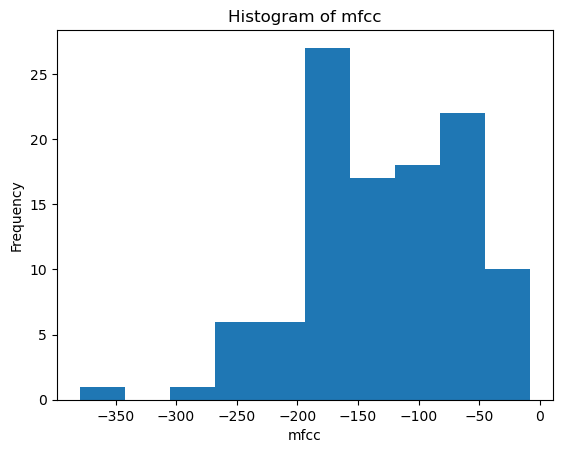

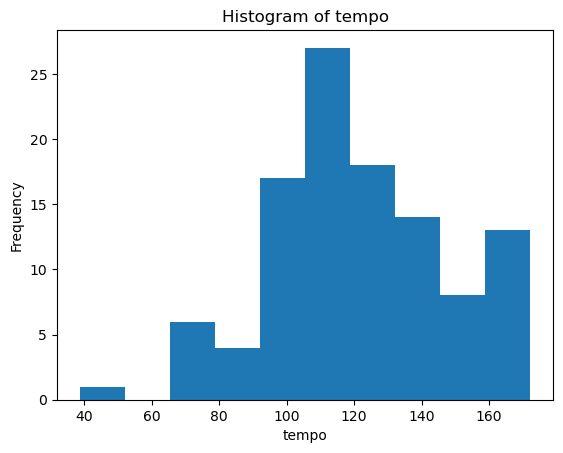

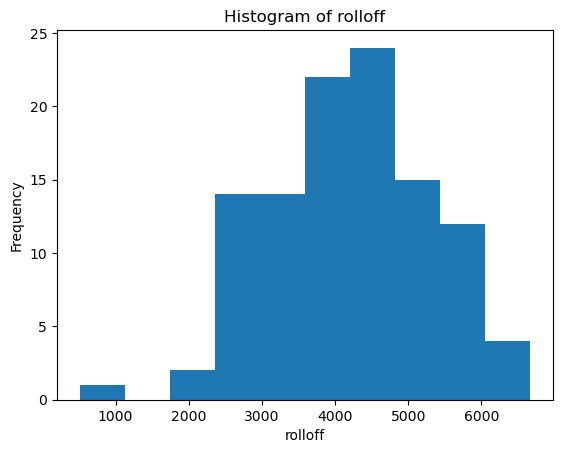

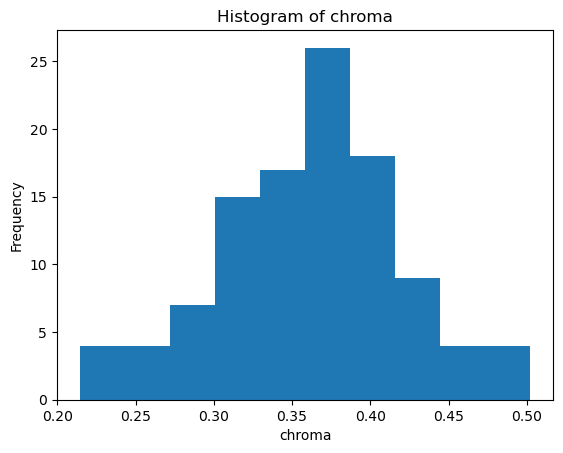

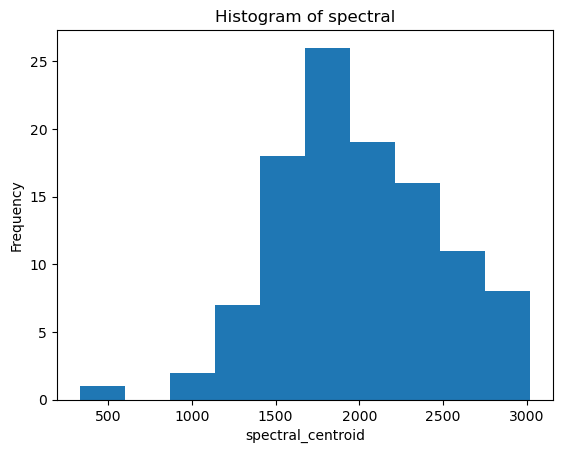

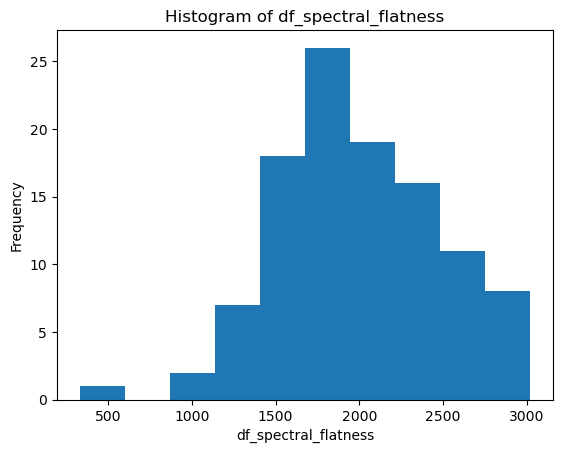

In [8]:
dataset_features = calculate_group_analytics('music_files/')

pathh: music_files/
songfilesssss ['Ben E. King - Stand By Me (Audio).mp3', "P!nk - Please Don't Leave Me (Official Video).mp3", 'Chris Stapleton - Tennessee Whiskey (Official Audio).mp3', 'Ed Sheeran - Dive [Official Audio].mp3', 'Sting - Shape of My Heart (Official Music Video).mp3', 'Giveon - Heartbreak Anniversary (Audio).mp3', 'Seal - Kiss From A Rose [Seal Version] (Official Video) [HD].mp3', 'Lizzy McAlpine_PushingItDownand Praying.mp3', "James Blunt - You're Beautiful (Official Music Video) [4K].mp3", 'KAYTRANADA_Witchy.mp3', 'bow_wow.mp3', 'VictoriaMonét_Alright.mp3', 'Kodaline - All I Want (Part 1).mp3', 'The 1975 - Somebody Else (Official Video).mp3', 'Chappell Roan - Good Luck, Babe! (Lyrics).mp3', 'Billie Eilish - Ocean Eyes (Official Music Video).mp3', '.DS_Store', 'Sade - By Your Side - Official - 2000.mp3', 'LizzyMcAlpine_ceilings.mp3', 'Addison Rae - Diet Pepsi (Lyrics).mp3', 'Shaboozey_ABarSong.mp3', 'Calum Scott - You Are The Reason (Official Video).mp3', 'Tyla_Wate

mfcc: -112.24531555175781
tempo as is: [117.45383523]
tempo: 117.45383522727273
rolloff: 4949.158912881299
chroma: 0.3950238525867462
spectral_centroid: 2234.586512971559
spectral_flatness: 0.04352854937314987
prediction: [3]
Input song is most similar to song:  Ed Sheeran - Dive [Official Audio].mp3


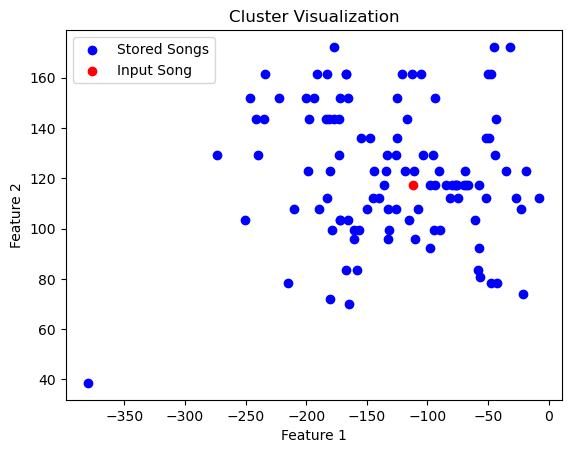

In [15]:
# K means cluster algorithm...
list_of_song_files = os.listdir('music_files/') 
individual_song_features = analyze_music_file('tanerelle.mp3')
cluster_index = k_means_cluster(individual_song_features, dataset_features)
closest_song_name = list_of_song_files[cluster_index[0]]
print(f"Input song is most similar to song: ", closest_song_name)

plot_clusters(individual_song_features, dataset_features, cluster_index)

In [16]:
#nearest neighbor algorithm
index = nearestNeighbor(individual_song_features,dataset_features)
print('index: ', index)
closest_song_name = list_of_song_files[index[0][0]]
print(closest_song_name)

individual 2d:  [[0.71875287 0.59003497 0.72055508 0.62765674 0.70740452 0.41646996]]
individual:  [[0.71875287 0.59003497 0.72055508 0.62765674 0.70740452 0.41646996]]
index:  [array([101])]
New Radicals - You Get What You Give (Official Music Video).mp3
